## 借貸俱樂部資料分析

### 讀取資料

In [1]:
import pandas
data_clean = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/main/data/LoanStats3b.txt')

In [2]:
data_clean.head(3)

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,8000.0,4,30000.0,5,4,2451.18,0.0,0.0,17.77,9.0,5.675354,14.108222,178.487331,84.3,830.0,13796.095653,3.0,0
1,8000.0,10,75000.0,5,4,288.30,9.0,0.0,17.77,13.0,10.000000,2.000000,151.000000,89.8,1144.0,1844.000000,8.0,1
2,7750.0,4,42000.0,5,4,284.29,0.0,0.0,19.05,13.0,3.000000,9.000000,34.000000,95.0,151.0,3504.000000,8.0,1


### 合格可分析的資料

1. 結構化資料

2. 沒有任何遺失值

3. 必須全部都是數值資料

In [3]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funded_amnt            11000 non-null  float64
 1   emp_length             11000 non-null  int64  
 2   annual_inc             11000 non-null  float64
 3   home_ownership         11000 non-null  int64  
 4   grade                  11000 non-null  int64  
 5   last_pymnt_amnt        11000 non-null  float64
 6   mort_acc               11000 non-null  float64
 7   pub_rec                11000 non-null  float64
 8   int_rate               11000 non-null  float64
 9   open_acc               11000 non-null  float64
 10  num_actv_rev_tl        11000 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  11000 non-null  float64
 12  mo_sin_old_rev_tl_op   11000 non-null  float64
 13  bc_util                11000 non-null  float64
 14  bc_open_to_buy         11000 non-null  float64
 15  av

In [4]:
data_clean.isna().sum()

funded_amnt              0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
loan_status              0
dtype: int64

In [5]:
data_clean.dtypes

funded_amnt              float64
emp_length                 int64
annual_inc               float64
home_ownership             int64
grade                      int64
last_pymnt_amnt          float64
mort_acc                 float64
pub_rec                  float64
int_rate                 float64
open_acc                 float64
num_actv_rev_tl          float64
mo_sin_rcnt_rev_tl_op    float64
mo_sin_old_rev_tl_op     float64
bc_util                  float64
bc_open_to_buy           float64
avg_cur_bal              float64
acc_open_past_24mths     float64
loan_status                int64
dtype: object

### 將資料區分為 X 跟 Y

In [6]:
y = data_clean.iloc[:,-1]
X = data_clean.iloc[:,:-1]

### 將資料標準化

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### 分為訓練與測試資料

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8800, 17), (2200, 17), (8800,), (2200,))

### RFE (特徵篩選)

In [10]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE

clf_LR = linear_model.LogisticRegression(C=1e30, max_iter = 10000)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1e+30, max_iter=10000)

In [ ]:
?RFE

In [11]:
rfe = RFE(clf_LR, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [12]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True  True False  True  True False  True
  True False False  True  True]
[1 2 1 7 3 1 1 4 1 1 6 1 1 5 8 1 1]


In [13]:
X.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'last_pymnt_amnt', 'mort_acc', 'int_rate',
       'open_acc', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'avg_cur_bal', 'acc_open_past_24mths'],
      dtype='object')

### RFECV  (特徵篩選)

In [14]:
from sklearn.feature_selection import RFECV
rfe2 = RFECV(clf_LR)
rfe2 = rfe2.fit(X,y)

In [15]:
rfe2.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True])

In [16]:
rfe2.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1])

### PCA (特徵萃取)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))


Expected Variance is [0.16047384 0.14744299 0.12365715 0.07227799 0.06986598 0.06863585
 0.05480765 0.05216162 0.04555649 0.04341185]


<BarContainer object of 10 artists>

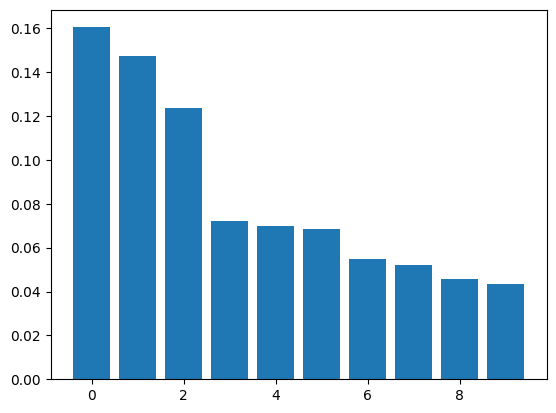

In [18]:
from matplotlib import pyplot as plt
plt.bar(x= range(10), height=pca.explained_variance_ratio_)

### 資料篩選

In [20]:
X.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'last_pymnt_amnt', 'mort_acc', 'int_rate',
       'open_acc', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'avg_cur_bal', 'acc_open_past_24mths'],
      dtype='object')

In [19]:
X.columns[rfe2.support_]

Index(['funded_amnt', 'emp_length', 'home_ownership', 'grade',
       'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate', 'open_acc',
       'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'bc_util', 'bc_open_to_buy', 'acc_open_past_24mths'],
      dtype='object')

In [27]:
import pandas
data_clean = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/main/data/LoanStats3b.txt')

In [28]:
data_clean = data_clean[['funded_amnt', 'annual_inc', 'last_pymnt_amnt', 'mort_acc', 'int_rate',
       'open_acc', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'avg_cur_bal', 'acc_open_past_24mths', 'loan_status']]

In [25]:
X_train = X_train[:,rfe.support_]
X_test = X_test[:,rfe.support_]

In [29]:
X_train.shape, X_test.shape

((8800, 10), (2200, 10))

### Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    cv_results = pd.DataFrame(grid.cv_results_)
    mean_scores = cv_results['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_


In [31]:
logreg = linear_model.LogisticRegression(random_state=0, max_iter = 10000)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)



Best accuracy is 0.7929090909090909
LogisticRegression(C=0.1, max_iter=10000, random_state=0)


In [32]:
Best_classifier

LogisticRegression(C=0.1, max_iter=10000, random_state=0)

In [33]:
Best_classifier.C

0.1

In [34]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)


LogisticRegression(C=0.1)

In [35]:
from sklearn.metrics import accuracy_score
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
LR_Accuracy

0.7972727272727272

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LR_Predict.round())

array([[764, 320],
       [126, 990]])

### ROC Curve

In [40]:
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc
sns.set('talk', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

def plotAUC(truth, pred, lab):
    fpr, tpr, _ = roc_curve(truth,pred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic
    plt.legend(loc="lower right")


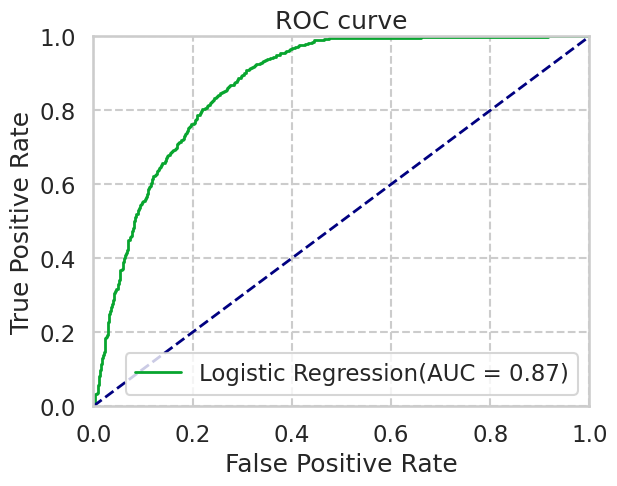

In [41]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()



### SVM

In [42]:
from sklearn import svm
clf_svm = svm.SVC()

In [43]:
powers = range(0,5)
cs = [10**i for i in powers]
cs = [100]

In [44]:
param_grid = dict(C=cs)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')
grid.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [100]},
             scoring='accuracy')

In [45]:
cv_results = pd.DataFrame(grid.cv_results_)
grid_mean_scores = cv_results['mean_test_score']
print("---------------")
print(grid.best_estimator_)


---------------
SVC(C=100)


In [46]:
#clf_svm = svm.SVC(kernel = "rbf", C=grid.best_estimator_.C)
clf_svm = svm.SVC(kernel = "rbf", C=100)

In [47]:
clf_svm.fit(X_train,y_train)
predictions_svm = clf_svm.predict(X_test)
predictproba_svm = clf_svm.decision_function(X_test)

In [48]:
SVM_Accuracy = accuracy_score(y_test,predictions_svm)
print("SVM accuracy is ",SVM_Accuracy)

SVM accuracy is  0.775


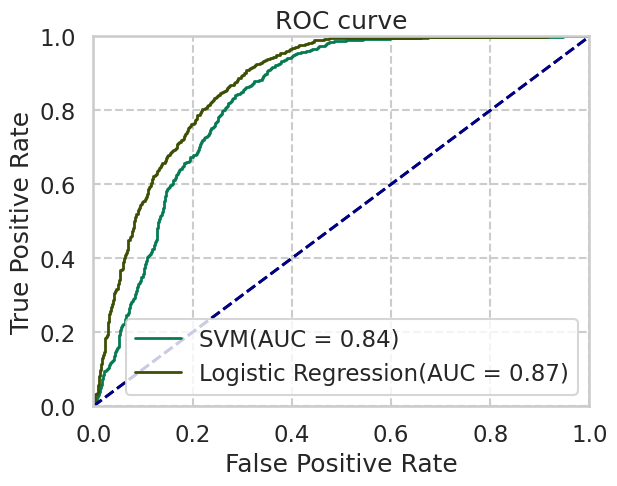

In [49]:
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

### RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=0)
rf

RandomForestClassifier(random_state=0)

In [51]:
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
maxFeatures

range(1, 10)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=9, param_distributions={'max_features': range(1, 10)},
                   random_state=10, scoring='accuracy')

In [53]:
print(rand.best_estimator_)

RandomForestClassifier(max_features=5, random_state=0)


In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.8072727272727273


In [57]:
from sklearn.metrics import roc_auc_score
rfPredictproba = randomForest.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,rfPredict)

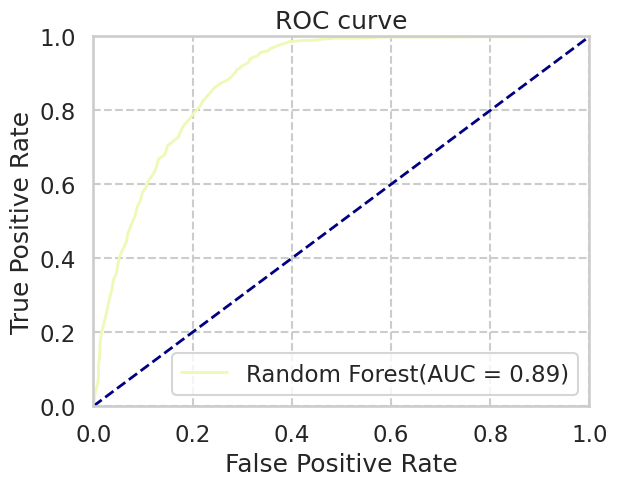

In [58]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()

### Feature Importance

In [65]:
randomForest.feature_importances_

array([0.07278267, 0.07168879, 0.45420655, 0.02483142, 0.11574333,
       0.04778393, 0.04773848, 0.0623068 , 0.0641801 , 0.03873795])

In [61]:
features = ['funded_amnt', 'annual_inc', 'last_pymnt_amnt', 'mort_acc', 'int_rate',
       'open_acc', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'avg_cur_bal', 'acc_open_past_24mths', 'loan_status']

Text(0, 0.5, 'Normalized Gini Importance')

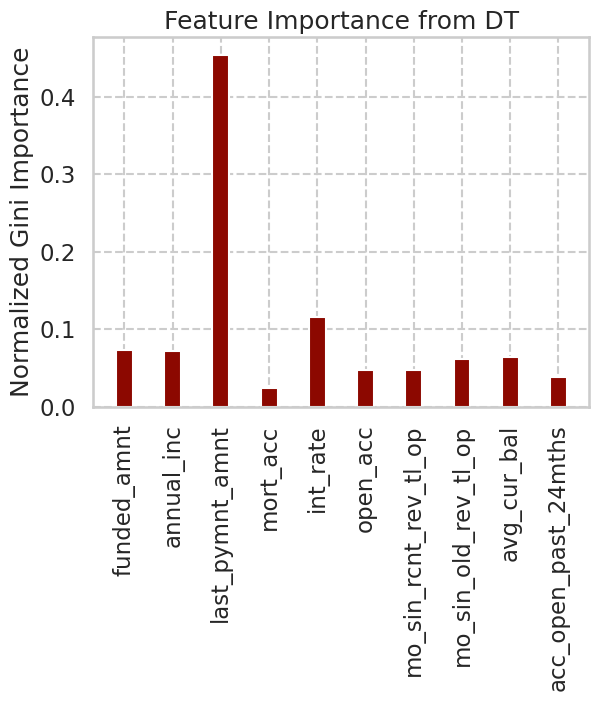

In [66]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(features[:-1],rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

### Model Comparison

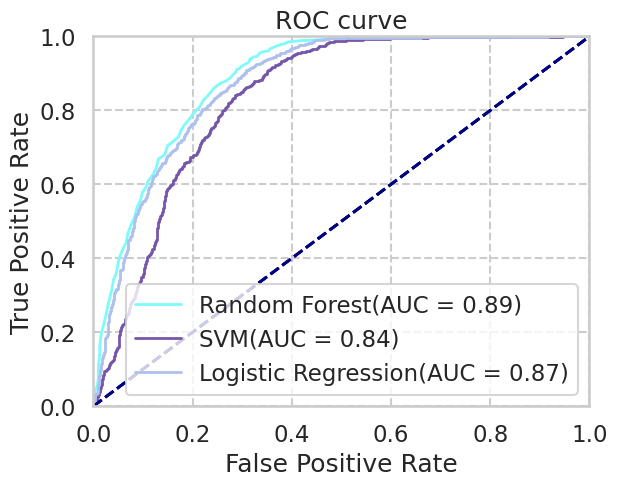

In [76]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

## 練習題 *1*

## 回家作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可降低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home Related, Other

預測目標

- Creditability (可信客戶): 1/0

請用Python 回答以下問題


- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請使用GridSearch 從 c = 0.001, 0.01, 0.1, 1, 10, 100, 1000 找出 最好的模型
- 請計算出模型準確度(Accuracy)?


## Bagging

In [74]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=2)
num_trees = 100
model = BaggingClassifier(estimator=randomForest,n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values, cv=kfold)
print(results.mean())

0.804


## Adaboost

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

Ada_clf = AdaBoostClassifier(n_estimators=50)

scores = cross_val_score(Ada_clf, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values)
scores.mean()

0.8026363636363637

## Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gda_clf = GradientBoostingClassifier(n_estimators=50)
scores = cross_val_score(gda_clf, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values)
scores.mean()

0.8092727272727271

## XGBoost

In [78]:
import xgboost as xgb

In [79]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [86]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20

In [87]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
preds[0:3,:]

array([[0.40804768, 0.5919524 ],
       [0.9931376 , 0.00686248],
       [0.99321365, 0.00678631]], dtype=float32)

In [88]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 0, 0, ..., 1, 1, 0])

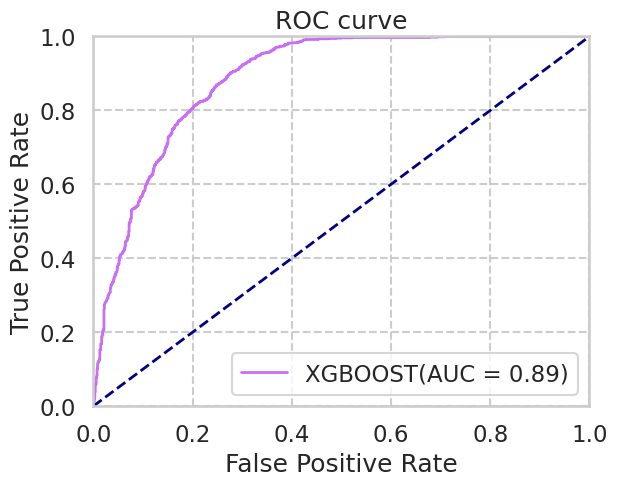

In [89]:
xgboost_predict = preds[:,1]
plotAUC(y_test,xgboost_predict,'XGBOOST')

In [93]:
from sklearn.metrics import classification_report

print("XGBOOST",classification_report(y_test, best_preds, target_names=None))

XGBOOST               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1084
           1       0.76      0.91      0.83      1116

    accuracy                           0.81      2200
   macro avg       0.82      0.81      0.81      2200
weighted avg       0.82      0.81      0.81      2200



## 階層式分群

In [94]:
from sklearn.datasets import load_iris
iris = load_iris()

In [95]:
X = iris.data
#y = iris.target

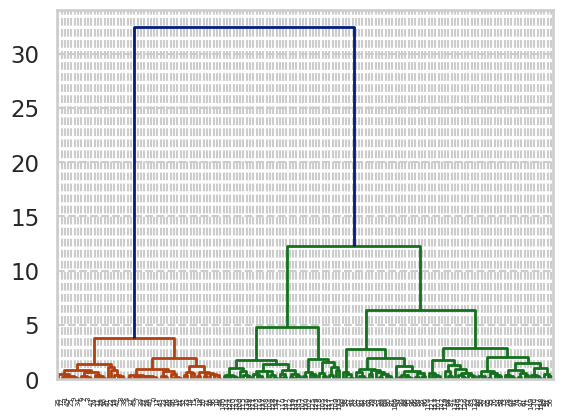

In [96]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward') )

In [97]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,  affinity = 'euclidean',linkage = 'ward' )

In [98]:
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


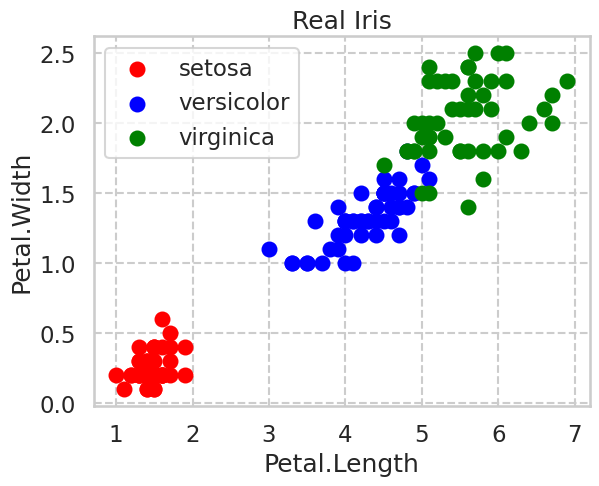

In [99]:
from matplotlib import pyplot as plt
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], s = 100, c = 'red', label = 'setosa')
plt.scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], s = 100, c = 'green', label = 'virginica')

plt.title('Real Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


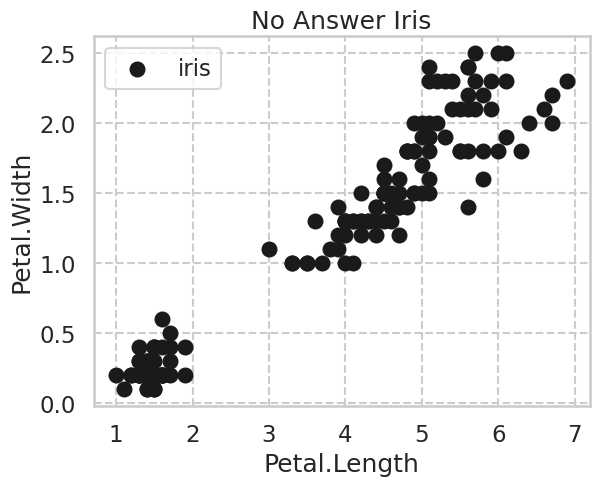

In [100]:
from matplotlib import pyplot as plt
plt.scatter(iris.data[:, 2], iris.data[:, 3], s = 100, c = 'k', label = 'iris')

plt.title('No Answer Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


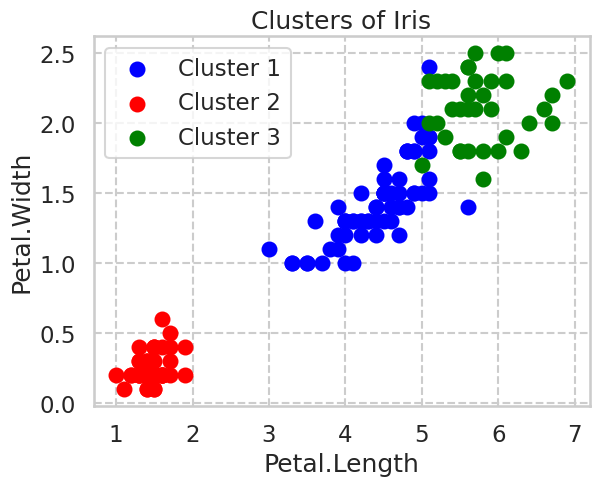

In [101]:
plt.scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [102]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2,  affinity = 'euclidean',linkage = 'ward' )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


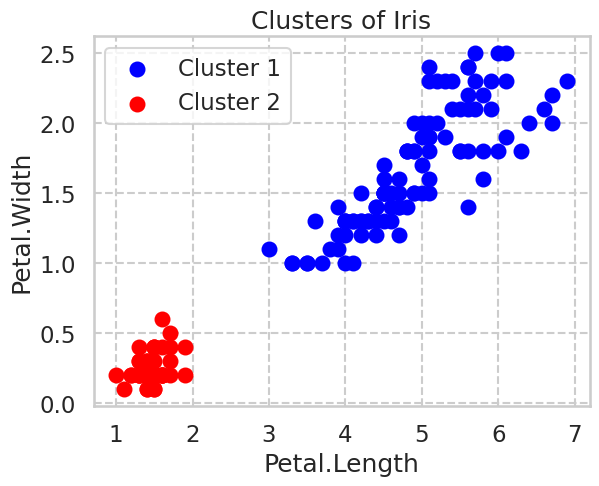

In [103]:
y_hc = hc.fit_predict(X)
plt.scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'red', label = 'Cluster 2')

plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


## K-Means

In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters  = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


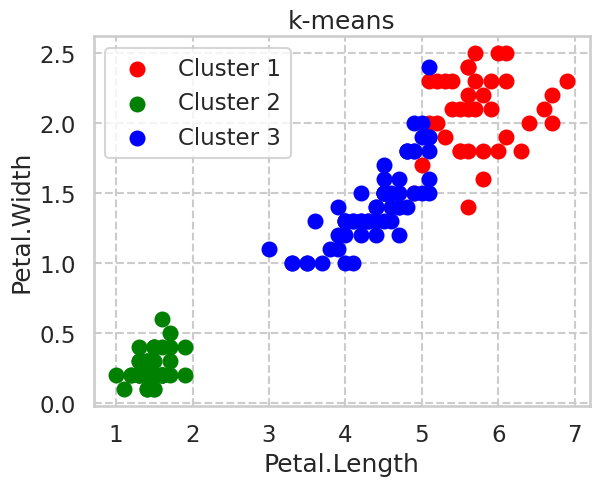

In [105]:
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'blue', label = 'Cluster 3')

plt.title('k-means')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


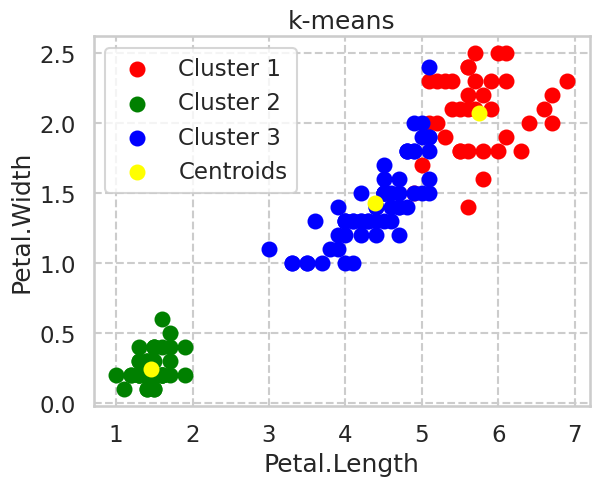

In [106]:
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('k-means')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [107]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/customers.csv')

In [108]:
X = df.iloc[:,[3,4]].values

In [109]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters  = 5, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


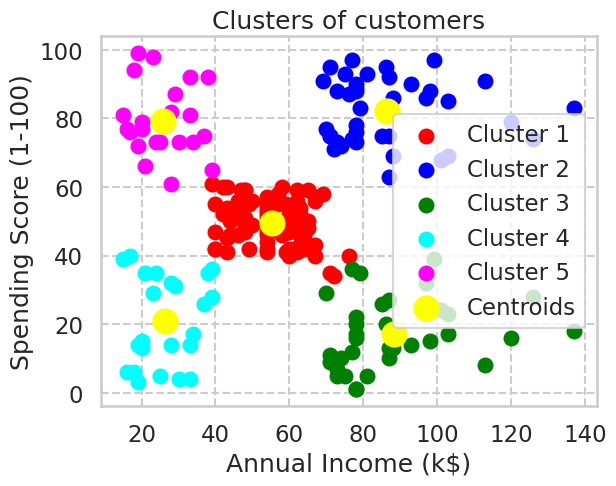

In [110]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## 練習題 2
針對客戶消費的資料(https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/customers.csv)
，請使用階層式分群法，將客戶分成五群，再將五群的資料，根據收入為X, 消費力為 Y, 將分群結果繪製於平面圖上


## Elbow Method

In [111]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/customers.csv')

In [112]:
X = df.iloc[:,[3,4]].values

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [114]:
wcss = []
for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
  y_kmeans = kmeans.fit_predict(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

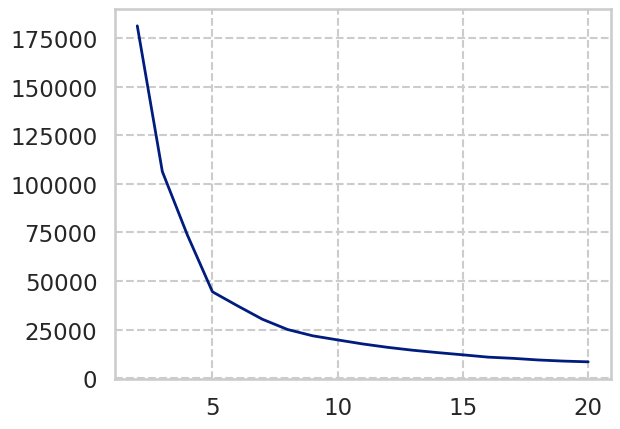

In [115]:
plt.plot(range(2,21), wcss)

In [116]:
wcss = []
for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
  y_kmeans = kmeans.fit_predict(iris.data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

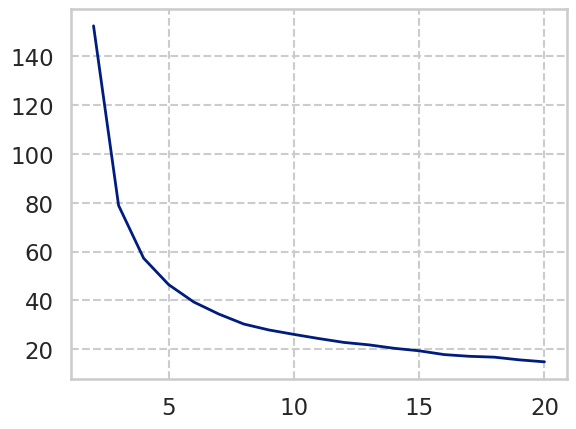

In [117]:
plt.plot(range(2,21), wcss)

## Sihouette

In [118]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(iris.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
silhouette_score(iris.data, y_kmeans)

0.5528190123564095

In [120]:
sil = []
for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
  y_kmeans = kmeans.fit_predict(iris.data)
  score = silhouette_score(iris.data, y_kmeans)
  sil.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

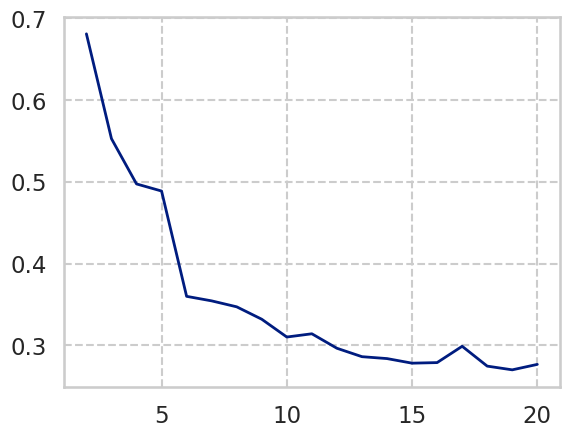

In [121]:
plt.plot(range(2,21), sil)

In [122]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/customers.csv')
X = df.iloc[:,[3,4]].values


In [123]:
sil = []
for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
  y_kmeans = kmeans.fit_predict(X)
  score = silhouette_score(X, y_kmeans)
  sil.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

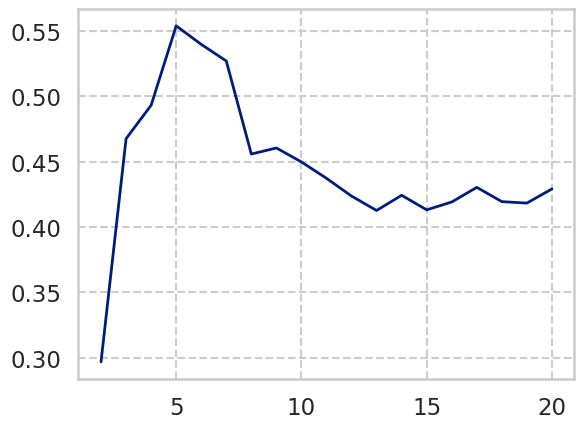

In [124]:
plt.plot(range(2,21), sil)

## DBSCAN

In [125]:
! wget https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/handwriting.png

--2023-12-22 02:38:31--  https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/handwriting.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477 [image/png]
Saving to: ‘handwriting.png’

handwriting.png     100%[===================>]     477  --.-KB/s    in 0s      

2023-12-22 02:38:32 (9.74 MB/s) - ‘handwriting.png’ saved [477/477]



In [126]:
from PIL import Image
img = Image.open('handwriting.png').convert('L').rotate(-90)
img

In [127]:
import numpy as np
im = np.array(img)

In [128]:
x,y = np.where(im == 0)

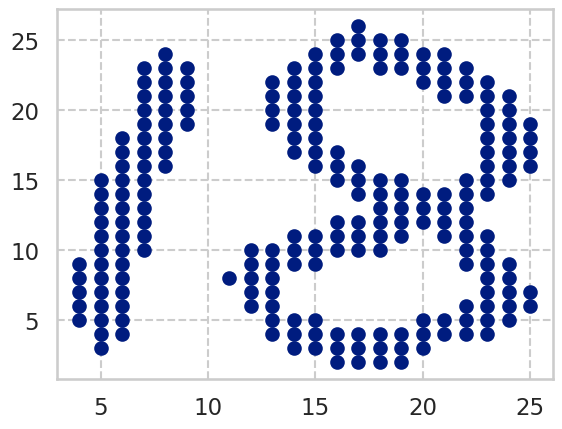

In [129]:
plt.scatter(x,y)

In [130]:
data = np.column_stack([x,y])

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


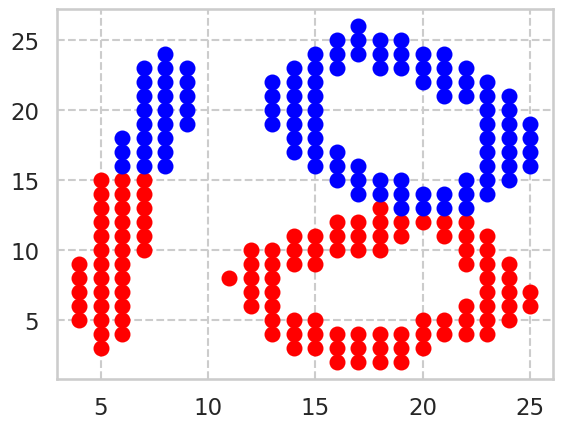

In [132]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.show()


In [133]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=3)
y_dbs = dbs.fit_predict(data)

In [134]:
y_dbs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

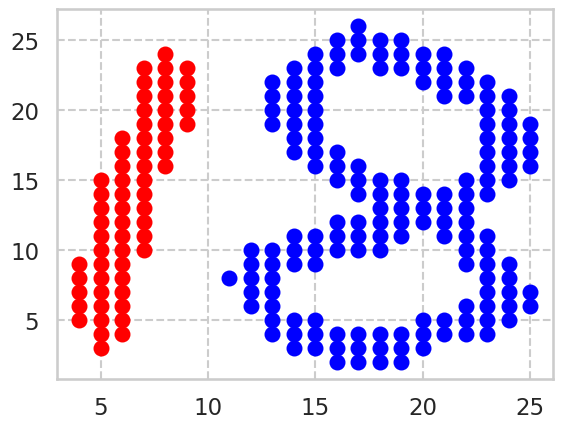

In [135]:
plt.scatter(data[y_dbs == 0, 0], data[y_dbs == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_dbs == 1, 0], data[y_dbs == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.show()
